### Preprocessing,Handling outliers,Feature selection

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_excel(r"C:\Users\Asus\Downloads\HR Analytics Data (3).xlsx")

In [4]:
df=data.copy()

In [5]:
df

,Year,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,...,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Unnamed: 20,Unnamed: 21
0,2016-17,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,...,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,NaN,NaN
1,2016-17,8,PC - 3,Kakalina Lorry,Level 4,Location 1,Client Service Staff,Serving Notice Period,Tallia Eyde,2004-07-31,...,1744,1528.0,97.0,216.0,0.0,1264.0,192.0,0.063482,NaN,NaN
2,2016-17,11,PC - 3,Aili Nessy,Level 4,Location 1,Client Service Staff,Serving Notice Period,Cacilia Aimee,2004-11-30,...,1616,1528.0,720.0,88.0,0.0,0.0,888.0,0.471204,NaN,NaN
3,2016-17,15,PC - 3,Peria Maryjo,Level 4,Location 2,Client Service Staff,Serving Notice Period,Barbee Joey,2005-02-28,...,872,766.0,36.0,104.0,2.0,0.0,746.0,0.046997,NaN,NaN
4,2016-17,36,PC - 6,Charlotta Marena,Level 4,Location 7,Client Service Staff,Serving Notice Period,Daryl Natalina,2009-01-31,...,848,768.0,688.0,80.0,0.0,0.0,80.0,0.895833,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2017-18,1103,PC - 1,Brock Walsh,Level 8,Location 3,Client Service Staff,Staff on Probation,Gavra Kayle,2018-03-31,...,80,-40.0,0.0,0.0,120.0,0.0,0.0,0.000000,NaN,NaN
1107,2017-18,1111,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,2018-03-31,...,40,24.0,0.0,8.0,8.0,0.0,24.0,0.000000,NaN,NaN
1108,2017-18,1104,PC - 3,Caiden Romero,Level 8,Location 1,Client Service Staff,Staff on Probation,Donette Verne,2018-03-31,...,40,9.0,0.0,8.0,23.0,0.0,9.0,0.000000,NaN,NaN
1109,2017-18,1105,PC - 3,Andy Mejia,Level 7,Location 1,Client Service Staff,Staff on Probation,Tiena Hatti,2018-03-31,...,40,0.0,0.0,8.0,32.0,0.0,0.0,NaN,NaN,NaN


In [6]:
df.shape

(1111, 22)

In [7]:
df.columns

Index(['Year', 'Employee No', 'Profit Center', 'Employee Name',
       'Employee Position', 'Employee Location', 'People Group',
       'Employee Category', 'Supervisor name', 'Join Date', 'Current Status',
       'Termination Date', 'Total Hours', 'Total Available Hours',
       'Work Hours', 'Leave Hours', 'Training Hours', 'BD Hours', 'NC Hours',
       'Utilization%', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [8]:
df.drop(["Employee No","Employee Name","Unnamed: 20","Unnamed: 21"],inplace=True,axis=1 )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   1111 non-null   object        
 1   Profit Center          1111 non-null   object        
 2   Employee Position      1111 non-null   object        
 3   Employee Location      1111 non-null   object        
 4   People Group           1111 non-null   object        
 5   Employee Category      1111 non-null   object        
 6   Supervisor name        1111 non-null   object        
 7   Join Date              1111 non-null   datetime64[ns]
 8   Current Status         1111 non-null   object        
 9   Termination Date       283 non-null    object        
 10  Total Hours            1111 non-null   int64         
 11  Total Available Hours  1111 non-null   float64       
 12  Work Hours             1111 non-null   float64       
 13  Lea

In [10]:
#Converting the datatype of relevant column(s)
df['Termination Date'] = pd.to_datetime(df['Termination Date'], errors='coerce')
df['Utilization%'] = df['Utilization%'] * 100

C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\2809361960.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Termination Date'] = pd.to_datetime(df['Termination Date'], errors='coerce')


In [11]:
df.head()

,Year,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,2016-17,PC - 4,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,NaT,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,12.365145
1,2016-17,PC - 3,Level 4,Location 1,Client Service Staff,Serving Notice Period,Tallia Eyde,2004-07-31,Resigned,2017-01-31,1744,1528.0,97.0,216.0,0.0,1264.0,192.0,6.348168
2,2016-17,PC - 3,Level 4,Location 1,Client Service Staff,Serving Notice Period,Cacilia Aimee,2004-11-30,Resigned,2017-01-31,1616,1528.0,720.0,88.0,0.0,0.0,888.0,47.120419
3,2016-17,PC - 3,Level 4,Location 2,Client Service Staff,Serving Notice Period,Barbee Joey,2005-02-28,Resigned,2016-08-31,872,766.0,36.0,104.0,2.0,0.0,746.0,4.699739
4,2016-17,PC - 6,Level 4,Location 7,Client Service Staff,Serving Notice Period,Daryl Natalina,2009-01-31,Resigned,2016-08-31,848,768.0,688.0,80.0,0.0,0.0,80.0,89.583333


In [12]:
df.isna().sum()

Year                       0
Profit Center              0
Employee Position          0
Employee Location          0
People Group               0
Employee Category          0
Supervisor name            0
Join Date                  0
Current Status             0
Termination Date         834
Total Hours                0
Total Available Hours      0
Work Hours                 0
Leave Hours                0
Training Hours             0
BD Hours                   0
NC Hours                   0
Utilization%               4
dtype: int64

In [13]:
#Filling null values
df['Termination Date'].fillna('31-12-2099', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\634657564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Termination Date'].fillna('31-12-2099', inplace=True)


In [14]:
df=df.dropna(subset=['Utilization%'])

In [15]:
df.isna().sum()

Year                     0
Profit Center            0
Employee Position        0
Employee Location        0
People Group             0
Employee Category        0
Supervisor name          0
Join Date                0
Current Status           0
Termination Date         0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             0
dtype: int64

In [16]:
#creating a new column tenure days
df["Tenure_days"]=np.where(df['Current Status'] == 'Resigned',
                             (df['Termination Date'] - df['Join Date']).dt.days,
                             np.nan)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\1706139134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tenure_days"]=np.where(df['Current Status'] == 'Resigned',


In [17]:
#converting 
df["Current Status"]=np.where(df["Current Status"]=="Active",1,0)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\1428433113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Current Status"]=np.where(df["Current Status"]=="Active",1,0)


In [18]:
df["Current Status"].value_counts(normalize=True)


Current Status
1    0.749774
0    0.250226
Name: proportion, dtype: float64

In [19]:
cont_col=[ 'Total Hours',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours', 'Tenure_days',"Utilization%"]

In [20]:
def median_absolute_deviation(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    return mad

def modified_zscore(data):
    median = np.median(data)
    mad = median_absolute_deviation(data)
    modified_z = 0.6745 * (data - median) / mad
    return modified_z

def analyze_outliers(df, columns, threshold=3.5):
    outliers = {}
    
    for col in columns:
        z_scores = modified_zscore(df[col])
        outlier_mask = np.abs(z_scores) > threshold
        outliers[col] = df[outlier_mask][col]
    
    return outliers

def print_outlier_analysis(df, outliers):
    print("Outlier Analysis:")
    for col, outlier_series in outliers.items():
        print(f"\n{col}:")
        print(f"  Number of outliers: {len(outlier_series)}")
        print(f"  Percentage of outliers: {(len(outlier_series) / len(df)) * 100:.2f}%")
        if not outlier_series.empty:
            print("  Outlier values:")
            print(outlier_series)

In [21]:
outliers = analyze_outliers(df, cont_col)

# Print the analysis
print_outlier_analysis(df, outliers)

Outlier Analysis:

Total Hours:
  Number of outliers: 0
  Percentage of outliers: 0.00%

Total Available Hours:
  Number of outliers: 0
  Percentage of outliers: 0.00%

Work Hours:
  Number of outliers: 0
  Percentage of outliers: 0.00%

Leave Hours:
  Number of outliers: 21
  Percentage of outliers: 1.90%
  Outlier values:
166    1100.0
168    1648.0
185    2824.0
186    1332.0
195    1832.0
205    1780.0
209    2632.0
212    1632.0
214    1732.0
225    1096.0
287    2187.0
299    1680.0
303    1680.0
306    1400.0
312    1440.0
334    1144.0
374    1224.0
414    2432.0
455    1134.0
457    1102.0
634    1144.0
Name: Leave Hours, dtype: float64

Training Hours:
  Number of outliers: 9
  Percentage of outliers: 0.81%
  Outlier values:
208    200.0
262    196.5
515    249.5
615    178.0
683    177.1
712    184.0
725    174.0
736    174.0
743    183.0
Name: Training Hours, dtype: float64

BD Hours:
  Number of outliers: 223
  Percentage of outliers: 20.14%
  Outlier values:
0       1159.

In [22]:
total_available_hours = df['Total Available Hours']
df['Work_Hours_Ratio'] = df['Work Hours'] / total_available_hours
df['Leave_Hours_Ratio'] = df['Leave Hours'] / total_available_hours
df['Training_Hours_Ratio'] = df['Training Hours'] / total_available_hours
df['BD_Hours_Ratio'] = df['BD Hours'] / total_available_hours
df['NC_Hours_Ratio'] = df['NC Hours'] / total_available_hours

C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\1861259174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work_Hours_Ratio'] = df['Work Hours'] / total_available_hours
C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\1861259174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Leave_Hours_Ratio'] = df['Leave Hours'] / total_available_hours
C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\1861259174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [23]:
df

,Year,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,...,Training Hours,BD Hours,NC Hours,Utilization%,Tenure_days,Work_Hours_Ratio,Leave_Hours_Ratio,Training_Hours_Ratio,BD_Hours_Ratio,NC_Hours_Ratio
0,2016-17,PC - 4,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,1,2099-12-31,...,3.0,1159.0,818.0,12.365145,NaN,0.123651,0.086307,0.002490,0.961826,0.678838
1,2016-17,PC - 3,Level 4,Location 1,Client Service Staff,Serving Notice Period,Tallia Eyde,2004-07-31,0,2017-01-31,...,0.0,1264.0,192.0,6.348168,4567.0,0.063482,0.141361,0.000000,0.827225,0.125654
2,2016-17,PC - 3,Level 4,Location 1,Client Service Staff,Serving Notice Period,Cacilia Aimee,2004-11-30,0,2017-01-31,...,0.0,0.0,888.0,47.120419,4445.0,0.471204,0.057592,0.000000,0.000000,0.581152
3,2016-17,PC - 3,Level 4,Location 2,Client Service Staff,Serving Notice Period,Barbee Joey,2005-02-28,0,2016-08-31,...,2.0,0.0,746.0,4.699739,4202.0,0.046997,0.135770,0.002611,0.000000,0.973890
4,2016-17,PC - 6,Level 4,Location 7,Client Service Staff,Serving Notice Period,Daryl Natalina,2009-01-31,0,2016-08-31,...,0.0,0.0,80.0,89.583333,2769.0,0.895833,0.104167,0.000000,0.000000,0.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,2017-18,PC - 3,Level 6,Location 1,Client Service Staff,Staff on Probation,Nikolia Shirl,2018-03-31,1,2099-12-31,...,40.0,0.0,40.0,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,1.000000
1106,2017-18,PC - 1,Level 8,Location 3,Client Service Staff,Staff on Probation,Gavra Kayle,2018-03-31,1,2099-12-31,...,120.0,0.0,0.0,0.000000,NaN,-0.000000,-0.000000,-3.000000,-0.000000,-0.000000
1107,2017-18,PC - 1,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,2018-03-31,1,2099-12-31,...,8.0,0.0,24.0,0.000000,NaN,0.000000,0.333333,0.333333,0.000000,1.000000
1108,2017-18,PC - 3,Level 8,Location 1,Client Service Staff,Staff on Probation,Donette Verne,2018-03-31,1,2099-12-31,...,23.0,0.0,9.0,0.000000,NaN,0.000000,0.888889,2.555556,0.000000,1.000000


In [24]:
df.describe()

,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Tenure_days,Work_Hours_Ratio,Leave_Hours_Ratio,Training_Hours_Ratio,BD_Hours_Ratio,NC_Hours_Ratio
count,1107,1107.000000,1107,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,277.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000
mean,2015-06-26 00:00:00,0.749774,2079-04-25 23:09:16.097561088,2626.449864,2286.953650,1726.928555,292.068202,48.371102,110.472448,579.457977,72.622358,879.725632,0.726224,0.132352,0.037357,0.036429,0.293102
min,1998-06-30 00:00:00,0.000000,2016-04-30 00:00:00,8.000000,-40.000000,0.000000,0.000000,0.000000,-24.000000,-28.500000,0.000000,0.000000,0.000000,0.000000,-3.000000,-0.006896,-0.007882
25%,2014-08-31 00:00:00,0.500000,2059-03-16 12:00:00,1360.000000,1177.000000,650.000000,112.000000,16.000000,0.000000,137.250000,56.386177,335.000000,0.563862,0.080835,0.007128,0.000000,0.094064
50%,2016-02-29 00:00:00,1.000000,2099-12-31 00:00:00,2760.000000,2405.000000,1516.000000,248.000000,39.000000,0.000000,377.500000,81.840431,640.000000,0.818404,0.111951,0.019619,0.000000,0.207668
75%,2017-04-30 00:00:00,1.000000,2099-12-31 00:00:00,4168.000000,3597.000000,2859.500000,416.000000,72.500000,0.000000,746.000000,93.926593,1127.000000,0.939266,0.140390,0.040196,0.000000,0.405959
max,2018-03-31 00:00:00,1.000000,2099-12-31 00:00:00,4168.000000,4168.000000,4716.000000,2824.000000,249.500000,3891.000000,4715.500000,600.000000,6360.000000,6.000000,3.000000,2.555556,1.000000,2.000000
std,NaN,0.433339,NaN,1467.997730,1296.867224,1209.891581,272.924247,40.594605,445.137898,650.699209,33.786620,832.312505,0.337866,0.178297,0.155947,0.138861,0.275200


In [25]:
#checking and printing rows with negative values 
rows_with_negatives = df[df[cont_col].lt(0).any(axis=1)]

print(f"Number of rows with at least one negative value: {len(rows_with_negatives)}")

print("\nRows with negative values:")
print(rows_with_negatives)

Number of rows with at least one negative value: 3

Rows with negative values:
         Year Profit Center Employee Position Employee Location  \
391   2017-18        PC - 3           Level 6        Location 1   
464   2017-18        PC - 2           Level 7        Location 7   
1106  2017-18        PC - 1           Level 8        Location 3   

              People Group   Employee Category  Supervisor name  Join Date  \
391   Client Service Staff     Confirmed Staff      Tiena Hatti 2015-02-28   
464   Client Service Staff     Confirmed Staff  Jillian Lorelei 2015-06-30   
1106  Client Service Staff  Staff on Probation      Gavra Kayle 2018-03-31   

      Current Status Termination Date  ...  Training Hours  BD Hours  \
391                1       2099-12-31  ...            36.0       8.0   
464                1       2099-12-31  ...            67.5     -24.0   
1106               1       2099-12-31  ...           120.0       0.0   

      NC Hours  Utilization%  Tenure_days  Work_Ho

In [26]:
negative_counts = (df[cont_col] < 0).sum()

print("\nCount of negative values in each column:")
print(negative_counts)


Count of negative values in each column:
Total Hours              0
Total Available Hours    1
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 1
NC Hours                 1
Tenure_days              0
Utilization%             0
dtype: int64


In [27]:
# Removing the negative values
df = df[~df[cont_col].lt(0).any(axis=1)]

In [28]:
df.describe()

,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Tenure_days,Work_Hours_Ratio,Leave_Hours_Ratio,Training_Hours_Ratio,BD_Hours_Ratio,NC_Hours_Ratio
count,1104,1104.000000,1104,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,277.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,2015-06-25 04:32:36.521739264,0.749094,2079-04-05 10:30:00,2625.963768,2286.776440,1725.768487,291.832880,48.300100,110.787138,580.261304,72.655159,879.725632,0.726552,0.132421,0.040149,0.036532,0.293677
min,1998-06-30 00:00:00,0.000000,2016-04-30 00:00:00,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-08-23 06:00:00,0.000000,2018-05-31 00:00:00,1364.000000,1178.500000,651.000000,112.000000,16.000000,0.000000,138.250000,56.506342,335.000000,0.565063,0.080849,0.007129,0.000000,0.094505
50%,2016-02-29 00:00:00,1.000000,2099-12-31 00:00:00,2760.000000,2394.000000,1516.000000,248.000000,39.000000,0.000000,378.250000,81.918136,640.000000,0.819181,0.111938,0.019747,0.000000,0.207728
75%,2017-04-30 00:00:00,1.000000,2099-12-31 00:00:00,4168.000000,3596.500000,2859.250000,416.000000,72.500000,0.000000,746.000000,93.922234,1127.000000,0.939222,0.140223,0.040269,0.000000,0.406824
max,2018-03-31 00:00:00,1.000000,2099-12-31 00:00:00,4168.000000,4168.000000,4716.000000,2824.000000,249.500000,3891.000000,4715.500000,600.000000,6360.000000,6.000000,3.000000,2.555556,1.000000,2.000000
std,NaN,0.433731,NaN,1466.523309,1295.622233,1208.552274,272.891713,40.586659,445.701249,651.029202,33.749175,832.312505,0.337492,0.178489,0.126541,0.139036,0.275280


In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
df.shape

(1104, 210)

In [31]:
correlation_matrix = df.corr()
correlation_matrix

,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,...,Supervisor name_Trenna Mureil,Supervisor name_Trudey Lissi,Supervisor name_Vanessa Zingaro,Supervisor name_Vinni Calypso,Supervisor name_Vonni Bethena,Supervisor name_Willette Lil,Supervisor name_Xylina Beatriz,Supervisor name_Yolanthe Laurella,Supervisor name_Zaneta Arlette,Supervisor name_Zaria Dawn
Join Date,1.000000,0.117807,0.118688,-0.406972,-0.395431,-0.115063,-0.332375,0.125750,-0.395332,-0.344279,...,-0.039586,-0.005423,0.057225,0.025825,-0.043810,-0.017481,0.049983,0.041780,0.027311,-0.063211
Current Status,0.117807,1.000000,0.999964,0.348704,0.339437,0.298281,0.221824,0.286139,0.079008,0.114320,...,-0.004267,0.052469,0.042782,0.000179,-0.076986,-0.024455,0.014364,0.049446,0.039037,0.046231
Termination Date,0.118688,0.999964,1.000000,0.351093,0.341796,0.300322,0.223273,0.287431,0.079321,0.115256,...,-0.004425,0.052467,0.042781,0.000045,-0.077117,-0.024590,0.014673,0.049444,0.039035,0.046229
Total Hours,-0.406972,0.348704,0.351093,1.000000,0.987382,0.799381,0.648168,0.276006,0.212819,0.448116,...,0.054372,0.076514,-0.055437,0.013757,-0.007537,0.001925,-0.040846,-0.014511,0.027297,0.034084
Total Available Hours,-0.395431,0.339437,0.341796,0.987382,1.000000,0.806165,0.521934,0.251243,0.220480,0.456043,...,0.058694,0.082591,-0.057668,0.013927,-0.008385,0.008826,-0.039192,-0.013138,0.027317,0.023685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Supervisor name_Willette Lil,-0.017481,-0.024455,-0.024590,0.001925,0.008826,0.010669,-0.023752,-0.054466,-0.021246,0.014268,...,-0.010027,-0.007746,-0.006316,-0.007299,-0.008168,1.000000,-0.006316,-0.007299,-0.005763,-0.006825
Supervisor name_Xylina Beatriz,0.049983,0.014364,0.014673,-0.040846,-0.039192,-0.024096,-0.030488,-0.021502,-0.017941,-0.028032,...,-0.008676,-0.006702,-0.005464,-0.006316,-0.007067,-0.006316,1.000000,-0.006316,-0.004986,-0.005905
Supervisor name_Yolanthe Laurella,0.041780,0.049446,0.049444,-0.014511,-0.013138,0.010355,-0.020307,0.029641,-0.016452,-0.031520,...,-0.010027,-0.007746,-0.006316,-0.007299,-0.008168,-0.007299,-0.006316,1.000000,-0.005763,-0.006825
Supervisor name_Zaneta Arlette,0.027311,0.039037,0.039035,0.027297,0.027317,0.062070,0.013493,0.022030,-0.011929,-0.034564,...,-0.007916,-0.006115,-0.004986,-0.005763,-0.006449,-0.005763,-0.004986,-0.005763,1.000000,-0.005388


In [32]:
sorted_correlation = correlation_matrix['Current Status'].abs().sort_values(ascending=False)
print(sorted_correlation)

Current Status                       1.000000
Termination Date                     0.999964
Employee Category_Confirmed Staff    0.727342
Employee Category_Resigned           0.671874
Year_2017-18                         0.618683
                                       ...   
Supervisor name_Jolyn Briney         0.000253
Supervisor name_Tommy Muire          0.000179
Supervisor name_Vinni Calypso        0.000179
Supervisor name_Lee Alfie            0.000179
Tenure_days                               NaN
Name: Current Status, Length: 210, dtype: float64


In [33]:
selected_features = sorted_correlation[sorted_correlation > 0.2].index.tolist()
selected_features.remove('Current Status') 
selected_features

['Termination Date',
 'Employee Category_Confirmed Staff',
 'Employee Category_Resigned',
 'Year_2017-18',
 'Employee Category_Serving Notice Period',
 'Total Hours',
 'Total Available Hours',
 'Work Hours',
 'Training Hours',
 'Profit Center_PC - 5',
 'Profit Center_PC - 6',
 'Leave Hours']

In [34]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif


X = df[selected_features] 
y = df['Current Status']


datetime_cols = X.select_dtypes(include=['datetime64']).columns


X = X.drop(columns=datetime_cols)


mutual_info = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame to display feature names and their mutual information scores
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': mutual_info})

# Sort features by mutual information scores
mi_df = mi_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Select features with high mutual information score 
selected_mi_features = mi_df[mi_df['Mutual_Info_Score'] > 0.1]['Feature'].tolist()

mi_df

,Feature,Mutual_Info_Score
0,Employee Category_Confirmed Staff,0.316090
4,Total Hours,0.202984
1,Employee Category_Resigned,0.191572
2,Year_2017-18,0.169700
3,Employee Category_Serving Notice Period,0.132914
5,Total Available Hours,0.103550
7,Training Hours,0.090948
6,Work Hours,0.073249
8,Profit Center_PC - 5,0.048506
10,Leave Hours,0.045612


In [35]:
final_selected_features = list(set(selected_features) & set(selected_mi_features))
print("Final Selected Features:", final_selected_features)


Final Selected Features: ['Employee Category_Serving Notice Period', 'Employee Category_Resigned', 'Total Hours', 'Year_2017-18', 'Employee Category_Confirmed Staff', 'Total Available Hours']


In [36]:
df.columns

Index(['Join Date', 'Current Status', 'Termination Date', 'Total Hours',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours',
       ...
       'Supervisor name_Trenna Mureil', 'Supervisor name_Trudey Lissi',
       'Supervisor name_Vanessa Zingaro', 'Supervisor name_Vinni Calypso',
       'Supervisor name_Vonni Bethena', 'Supervisor name_Willette Lil',
       'Supervisor name_Xylina Beatriz', 'Supervisor name_Yolanthe Laurella',
       'Supervisor name_Zaneta Arlette', 'Supervisor name_Zaria Dawn'],
      dtype='object', length=210)

### EDA  

In [37]:
df.shape

(1104, 210)

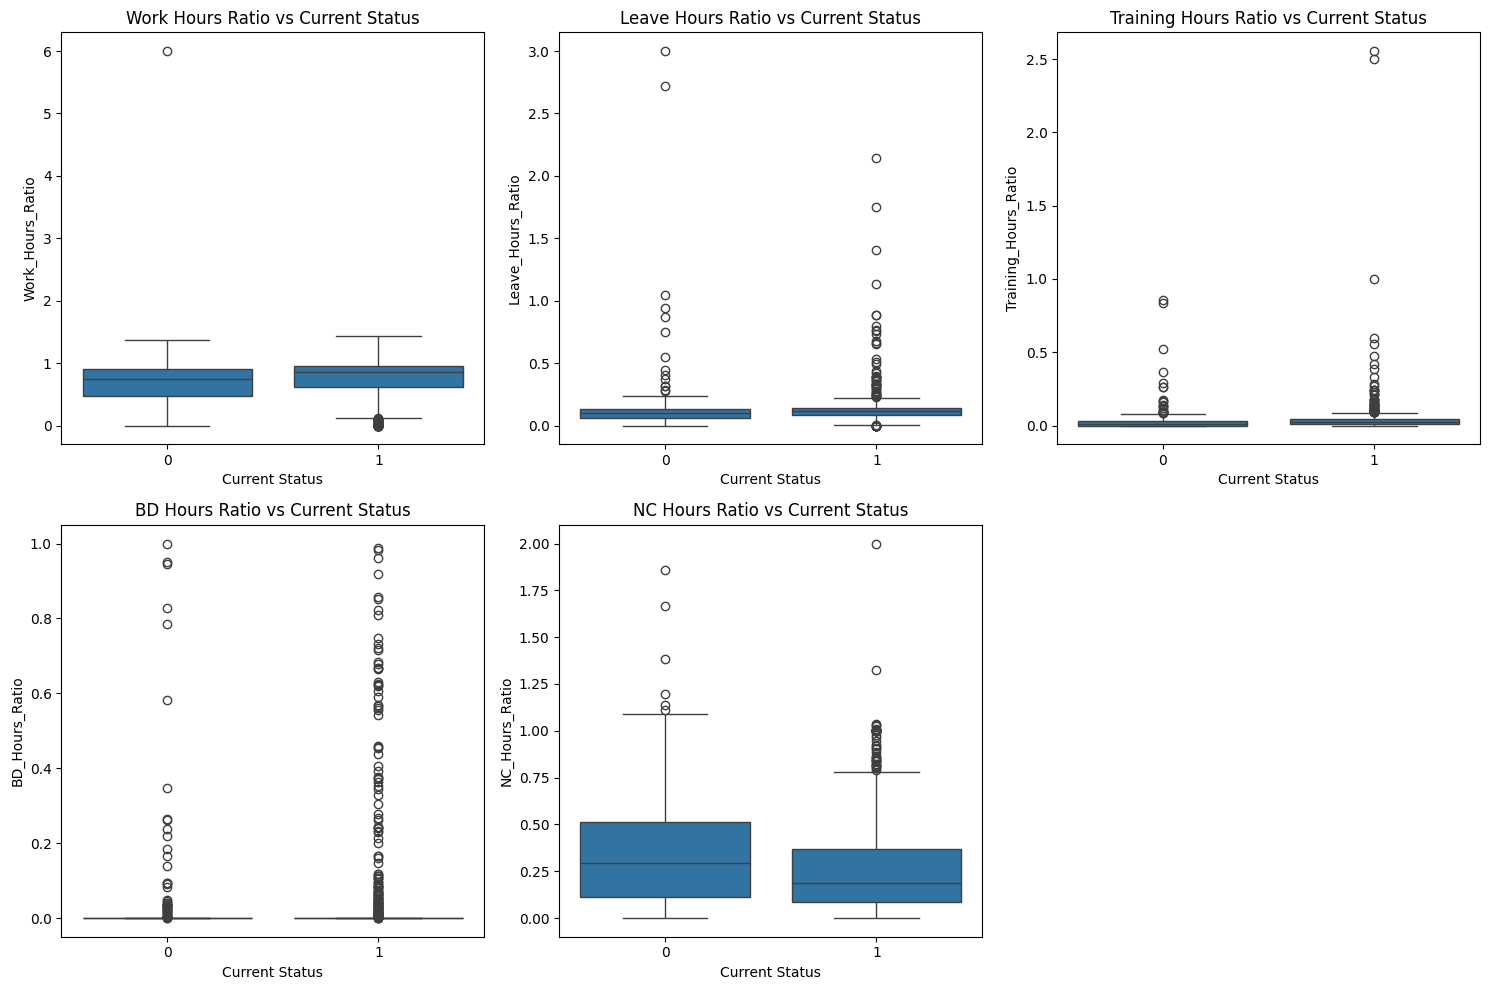

In [38]:
plt.figure(figsize=(15, 10))

# Work Hours Ratio
plt.subplot(2, 3, 1)
sns.boxplot(x='Current Status', y='Work_Hours_Ratio', data=df)
plt.title('Work Hours Ratio vs Current Status')

# Leave Hours Ratio
plt.subplot(2, 3, 2)
sns.boxplot(x='Current Status', y='Leave_Hours_Ratio', data=df)
plt.title('Leave Hours Ratio vs Current Status')

# Training Hours Ratio
plt.subplot(2, 3, 3)
sns.boxplot(x='Current Status', y='Training_Hours_Ratio', data=df)
plt.title('Training Hours Ratio vs Current Status')

# BD Hours Ratio
plt.subplot(2, 3, 4)
sns.boxplot(x='Current Status', y='BD_Hours_Ratio', data=df)
plt.title('BD Hours Ratio vs Current Status')

# NC Hours Ratio
plt.subplot(2, 3, 5)
sns.boxplot(x='Current Status', y='NC_Hours_Ratio', data=df)
plt.title('NC Hours Ratio vs Current Status')

plt.tight_layout()
plt.show()

In [39]:
# Identify and drop supervisor columns
supervisor_columns = [col for col in df.columns if 'Supervisor name_' in col]
df = df.drop(supervisor_columns, axis=1)
print(df.shape)


(1104, 59)


In [40]:
df.columns

Index(['Join Date', 'Current Status', 'Termination Date', 'Total Hours',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours', 'Utilization%', 'Tenure_days',
       'Work_Hours_Ratio', 'Leave_Hours_Ratio', 'Training_Hours_Ratio',
       'BD_Hours_Ratio', 'NC_Hours_Ratio', 'Year_2017-18',
       'Profit Center_PC - 10', 'Profit Center_PC - 11',
       'Profit Center_PC - 2', 'Profit Center_PC - 3', 'Profit Center_PC - 4',
       'Profit Center_PC - 5', 'Profit Center_PC - 6', 'Profit Center_PC - 7',
       'Profit Center_PC - 8', 'Employee Position_Level 1',
       'Employee Position_Level 10', 'Employee Position_Level 2',
       'Employee Position_Level 3', 'Employee Position_Level 4',
       'Employee Position_Level 5', 'Employee Position_Level 6',
       'Employee Position_Level 7', 'Employee Position_Level 8',
       'Employee Position_Level A1', 'Employee Position_Level A2',
       'Employee Position_Level A3', 'Employee Locat

C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\3764162110.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Current Status'] == status]['Tenure_days'], label=status, shade=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\3764162110.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Current Status'] == status]['Tenure_days'], label=status, shade=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_25464\3764162110.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Current Status'] == status]['Tenure_days'], label=status, shade=True)


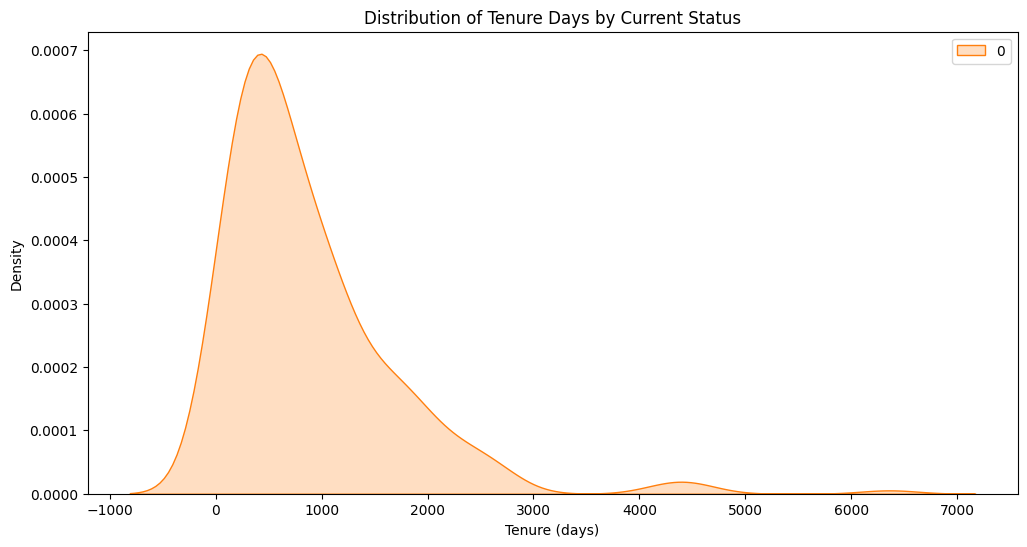

In [41]:
#KDE fro tenure days 
plt.figure(figsize=(12, 6))
for status in df['Current Status'].unique():
    sns.kdeplot(df[df['Current Status'] == status]['Tenure_days'], label=status, shade=True)
plt.title('Distribution of Tenure Days by Current Status')
plt.xlabel('Tenure (days)')
plt.legend()
plt.show()

### We can infer that most of the atttiriton happens in the early days(0-1000) and then decreases as the tenure increases 

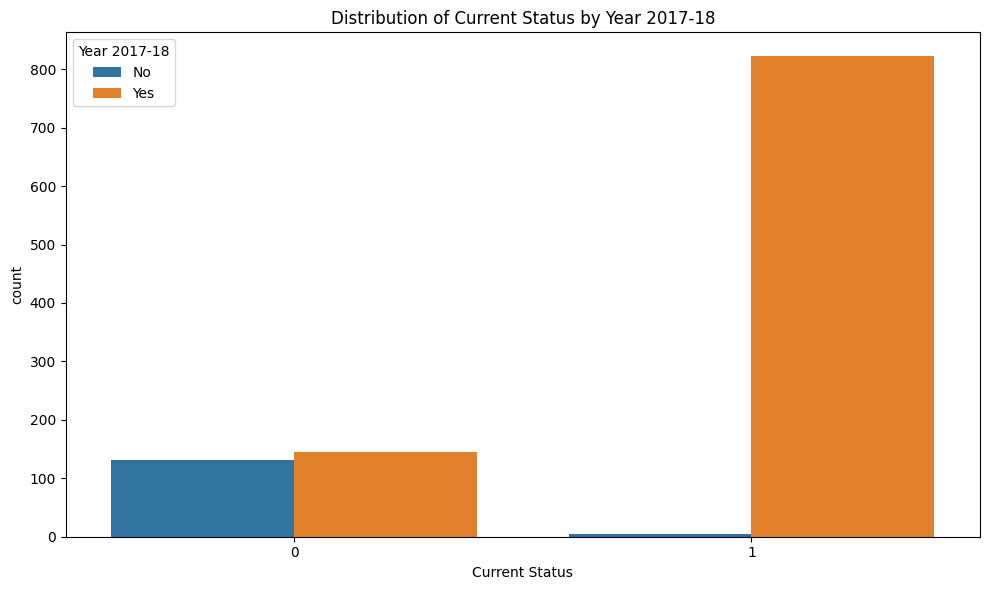

In [42]:
# Target variable with respect to YEar 2017-18
plt.figure(figsize=(10, 6))
sns.countplot(x='Current Status', hue='Year_2017-18', data=df)
plt.title('Distribution of Current Status by Year 2017-18')
plt.legend(title='Year 2017-18', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Employees with year 2017-18 are more likely to be active and with the organization

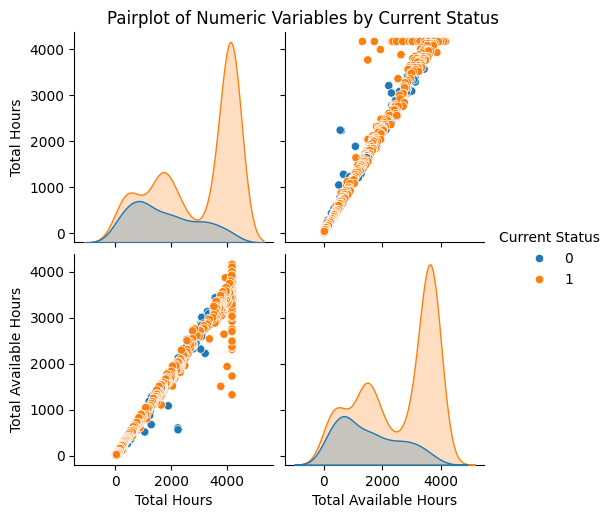

In [43]:
# TOTAl hours and total available hours
sns.pairplot(df[['Current Status', 'Total Hours', 'Total Available Hours']], hue='Current Status')
plt.suptitle('Pairplot of Numeric Variables by Current Status', y=1.02)
plt.show()


In [44]:
position_columns = [col for col in df.columns if col.startswith('Employee Position_')]
location_columns = [col for col in df.columns if col.startswith('Employee Location_')]
df['Grouped_Position'] = df[position_columns].idxmax(axis=1).str.replace('Employee Position_', '')
df['Grouped_Location'] = df[location_columns].idxmax(axis=1).str.replace('Employee Location_', '')

Text(0, 0.5, 'Employee Position')

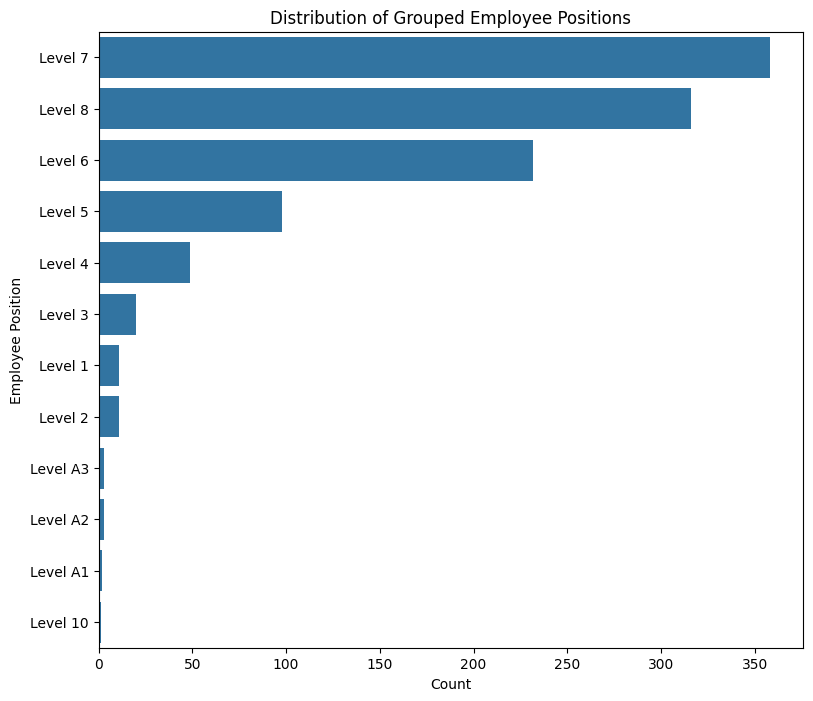

In [45]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.countplot(y='Grouped_Position', data=df, order=df['Grouped_Position'].value_counts().index)
plt.title('Distribution of Grouped Employee Positions')
plt.xlabel('Count')
plt.ylabel('Employee Position')

Text(0, 0.5, 'Employee Location')

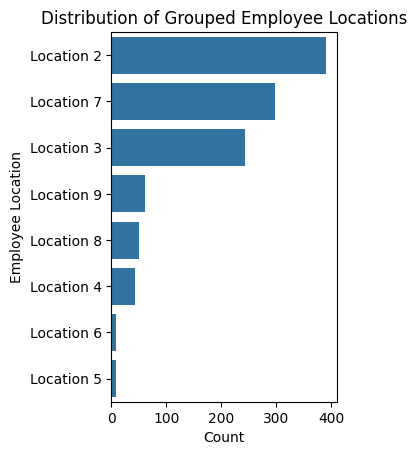

In [46]:
plt.subplot(1, 2, 2)
sns.countplot(y='Grouped_Location', data=df, order=df['Grouped_Location'].value_counts().index)
plt.title('Distribution of Grouped Employee Locations')
plt.xlabel('Count')
plt.ylabel('Employee Location')

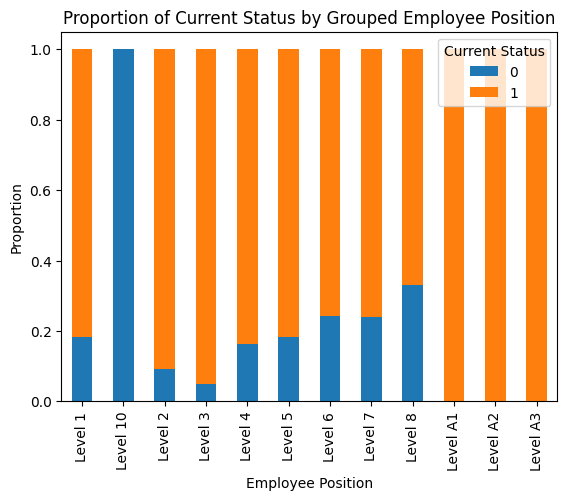

In [47]:
df.groupby('Grouped_Position')['Current Status'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Proportion of Current Status by Grouped Employee Position')
plt.xlabel('Employee Position')
plt.ylabel('Proportion')
plt.legend(title='Current Status')

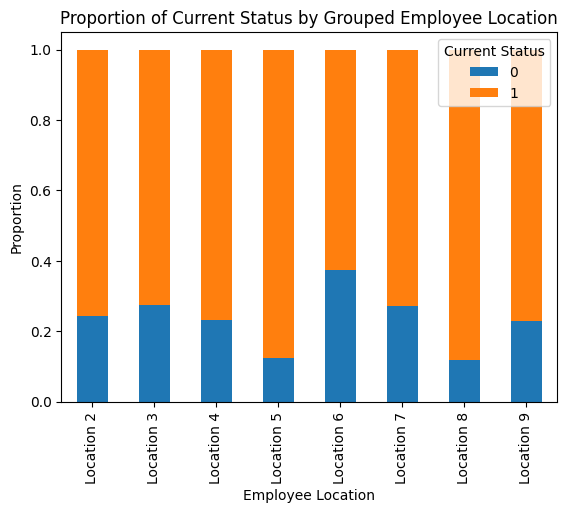

In [48]:
df.groupby('Grouped_Location')['Current Status'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Proportion of Current Status by Grouped Employee Location')
plt.xlabel('Employee Location')
plt.ylabel('Proportion')
plt.legend(title='Current Status')

### Location-6 has the most attrition 

In [49]:
df.drop(["Employee Category_Resigned", "Employee Category_Confirmed Staff", "Employee Category_Serving Notice Period"],axis=1)

,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,...,Employee Category_Confirmed Staff (Part-Time 4 Hours),Employee Category_Confirmed Staff (Part-Time 6 Hours),Employee Category_Confirmed-Sabbatical,Employee Category_Fixed term Staff,Employee Category_Level 1/2,Employee Category_SVP/VP,Employee Category_Secondee-Outward-Without Pay,Employee Category_Staff on Probation,Grouped_Position,Grouped_Location
0,1998-06-30,1,2099-12-31,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,...,False,False,False,False,True,False,False,False,Level 1,Location 3
1,2004-07-31,0,2017-01-31,1744,1528.0,97.0,216.0,0.0,1264.0,192.0,...,False,False,False,False,False,False,False,False,Level 4,Location 2
2,2004-11-30,0,2017-01-31,1616,1528.0,720.0,88.0,0.0,0.0,888.0,...,False,False,False,False,False,False,False,False,Level 4,Location 2
3,2005-02-28,0,2016-08-31,872,766.0,36.0,104.0,2.0,0.0,746.0,...,False,False,False,False,False,False,False,False,Level 4,Location 2
4,2009-01-31,0,2016-08-31,848,768.0,688.0,80.0,0.0,0.0,80.0,...,False,False,False,False,False,False,False,False,Level 4,Location 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,2018-03-31,1,2099-12-31,80,52.0,42.0,8.0,20.0,0.0,10.0,...,False,False,False,False,False,False,False,True,Level 8,Location 2
1104,2018-03-31,1,2099-12-31,80,40.0,0.0,0.0,40.0,0.0,40.0,...,False,False,False,False,False,False,False,True,Level 6,Location 2
1107,2018-03-31,1,2099-12-31,40,24.0,0.0,8.0,8.0,0.0,24.0,...,False,False,False,False,False,False,False,True,Level 7,Location 3
1108,2018-03-31,1,2099-12-31,40,9.0,0.0,8.0,23.0,0.0,9.0,...,False,False,False,False,False,False,False,True,Level 8,Location 2


In [50]:
df.drop(["Grouped_Position","Grouped_Location"],axis=1,inplace=True)

## Model Selection 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
traindf,testdf=train_test_split(df,train_size=0.7,random_state=2410)

In [53]:
trainX = traindf.drop(['Join Date', 'Termination Date', 'Current Status'], axis=1)
trainY = traindf['Current Status']
testX = testdf.drop(['Join Date', 'Termination Date', 'Current Status'], axis=1)
testY = testdf['Current Status']

In [54]:
trainX = trainX.drop(columns=['Tenure_days'])
testX = testX.drop(columns=['Tenure_days'])

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt=DecisionTreeClassifier().fit(trainX,trainY)

In [57]:
prediction=dt.predict(testX)

## Evaluation

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [59]:
print(confusion_matrix(testY,prediction))

[[ 81   0]
 [  5 246]]


In [60]:
print(classification_report(testY,prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       1.00      0.98      0.99       251

    accuracy                           0.98       332
   macro avg       0.97      0.99      0.98       332
weighted avg       0.99      0.98      0.99       332



In [61]:
train_predictions = dt.predict(trainX)

In [62]:
train_accuracy = accuracy_score(trainY, train_predictions)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [63]:
trainX.columns

Index(['Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%',
       'Work_Hours_Ratio', 'Leave_Hours_Ratio', 'Training_Hours_Ratio',
       'BD_Hours_Ratio', 'NC_Hours_Ratio', 'Year_2017-18',
       'Profit Center_PC - 10', 'Profit Center_PC - 11',
       'Profit Center_PC - 2', 'Profit Center_PC - 3', 'Profit Center_PC - 4',
       'Profit Center_PC - 5', 'Profit Center_PC - 6', 'Profit Center_PC - 7',
       'Profit Center_PC - 8', 'Employee Position_Level 1',
       'Employee Position_Level 10', 'Employee Position_Level 2',
       'Employee Position_Level 3', 'Employee Position_Level 4',
       'Employee Position_Level 5', 'Employee Position_Level 6',
       'Employee Position_Level 7', 'Employee Position_Level 8',
       'Employee Position_Level A1', 'Employee Position_Level A2',
       'Employee Position_Level A3', 'Employee Location_Location 2',
       'Employee Location_Location 3', 'Employee Locatio

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
cv_scores = cross_val_score(dt, trainX, trainY, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.98064516 1.         0.96753247 0.98051948 0.96753247]
Average Cross-Validation Score: 0.9792459153749477


### Fixing model to remove data leakage 

In [66]:
from sklearn.inspection import permutation_importance

In [67]:
##checking for feature importance and columns that can cause data leakage 
result = permutation_importance(dt, testX, testY, n_repeats=10, random_state=42, n_jobs=-1)

In [68]:
feature_importance = pd.DataFrame({
    'feature': testX.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
}).sort_values('importance', ascending=False)

In [69]:
print(feature_importance)

                                              feature  importance       std
44                  Employee Category_Confirmed Staff    0.243072  0.021971
54               Employee Category_Staff on Probation    0.099699  0.009568
0                                         Total Hours    0.057530  0.007906
50                         Employee Category_Resigned    0.018976  0.005049
13                                       Year_2017-18    0.018976  0.002352
52     Employee Category_Secondee-Outward-Without Pay    0.011747  0.002108
53            Employee Category_Serving Notice Period    0.008735  0.003421
41                       Employee Location_Location 8    0.004217  0.002410
10                               Training_Hours_Ratio    0.003916  0.002352
6                                            NC Hours    0.000000  0.000000
5                                            BD Hours    0.000000  0.000000
9                                   Leave_Hours_Ratio    0.000000  0.000000
11          

In [70]:
columns_to_remove = [
    'Employee Category_Resigned',
    'Employee Category_Confirmed Staff'
]

In [71]:
trainX_cleaned = trainX.drop(columns=columns_to_remove, errors='ignore')
testX_cleaned = testX.drop(columns=columns_to_remove, errors='ignore')

In [72]:
dt_cleaned=DecisionTreeClassifier().fit(trainX_cleaned,trainY)

In [73]:
pred_cleaned=dt_cleaned.predict(testX_cleaned)

In [74]:
print(confusion_matrix(testY, pred_cleaned))

[[ 58  23]
 [ 32 219]]


In [75]:
print("\nClassification Report:")
print(classification_report(testY, pred_cleaned))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        81
           1       0.90      0.87      0.89       251

    accuracy                           0.83       332
   macro avg       0.77      0.79      0.78       332
weighted avg       0.84      0.83      0.84       332



## Hyperparameter Tuning

In [76]:
# RandomizedSearchCV to find rough ranges for hyperparameters
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_dist = {
   'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 20, 1),         # Testing a wide range of tree depths
    'min_samples_split': np.arange(2, 20, 1), # Testing various split thresholds
    'min_samples_leaf': np.arange(1, 10, 1),  # Testing various leaf sizes
    'max_features': [None, 'sqrt', 'log2']    # Consider all features or limited subsets
}
# Perform RandomizedSearchCV with 50 iterations to explore the parameter space
random_search = RandomizedSearchCV(dt_cleaned, param_distributions=param_dist, n_iter=30, 
                                   scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
random_search.fit(trainX_cleaned, trainY)
print("Best parameters from RandomizedSearchCV:")
print(random_search.best_params_)
# Evaluate on the test set
y_pred_random = random_search.predict(testX_cleaned)
accuracy_random = accuracy_score(testY, y_pred_random)
print(f"Accuracy after RandomizedSearchCV: {accuracy_random:.4f}")

Best parameters from RandomizedSearchCV:
{'min_samples_split': np.int64(18), 'min_samples_leaf': np.int64(6), 'max_features': None, 'max_depth': np.int64(7), 'criterion': 'entropy'}
Accuracy after RandomizedSearchCV: 0.8825


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [77]:
# Now, based on the best parameters from RandomizedSearchCV, let's refine with GridSearchCV
best_params = random_search.best_params_
param_grid = {
    'criterion': [best_params['criterion']],                    # Fixing the best criterion
    'max_depth': np.arange(max(2, best_params['max_depth'] - 2), best_params['max_depth'] + 3),
    'min_samples_split': np.arange(max(2, best_params['min_samples_split'] - 2), best_params['min_samples_split'] + 3),
    'min_samples_leaf': np.arange(max(1, best_params['min_samples_leaf'] - 2), best_params['min_samples_leaf'] + 3),
    'max_features': [best_params['max_features']]  
}

grid_search = GridSearchCV(dt_cleaned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(trainX_cleaned, trainY)
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the refined model on the test set
y_pred_grid = grid_search.predict(testX_cleaned)
accuracy_grid = accuracy_score(testY, y_pred_grid)
print(f"Accuracy after GridSearchCV: {accuracy_grid:.4f}")

#classification report
class_report = classification_report(testY, y_pred_grid)
print("Classification Report:\n", class_report)

Best parameters from GridSearchCV:
{'criterion': 'entropy', 'max_depth': np.int64(6), 'max_features': None, 'min_samples_leaf': np.int64(6), 'min_samples_split': np.int64(17)}
Accuracy after GridSearchCV: 0.8735
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72        81
           1       0.89      0.94      0.92       251

    accuracy                           0.87       332
   macro avg       0.84      0.80      0.82       332
weighted avg       0.87      0.87      0.87       332



C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
